In [3]:

import numpy as np
import keras
from keras import layers
from keras.datasets import imdb
import matplotlib.pyplot as plt

# Load dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Multi-hot encode function
def multi_hot_encode(sequences, num_classes=10000):
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1.0
    return results

# Vectorize data
x_train = multi_hot_encode(train_data)
x_test = multi_hot_encode(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# ==========================
# Create validation set
# ==========================
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Question 1- Building with one hidden layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.6932 - loss: 0.6099 - val_accuracy: 0.8582 - val_loss: 0.3986
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8976 - loss: 0.3321 - val_accuracy: 0.8828 - val_loss: 0.3174
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9264 - loss: 0.2457 - val_accuracy: 0.8880 - val_loss: 0.2925
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9401 - loss: 0.1982 - val_accuracy: 0.8889 - val_loss: 0.2797
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9552 - loss: 0.1640 - val_accuracy: 0.8885 - val_loss: 0.2790
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9619 - loss: 0.1400 - val_accuracy: 0.8888 - val_loss: 0.2808
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9711 - loss: 0.1196 - val_accuracy: 0.8853 - val_loss: 0.2899
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9756 - loss: 0.1056 - val_accuracy: 0.8853 - v

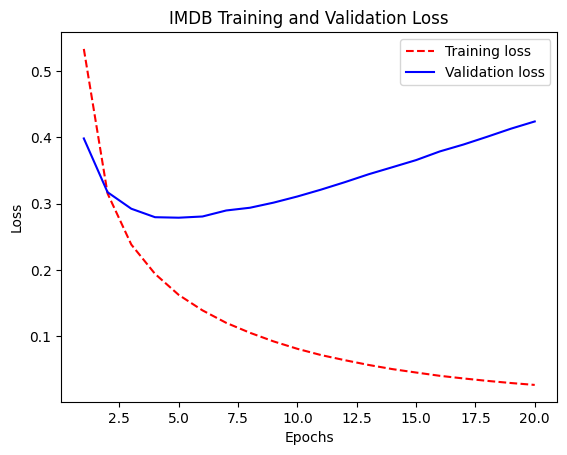

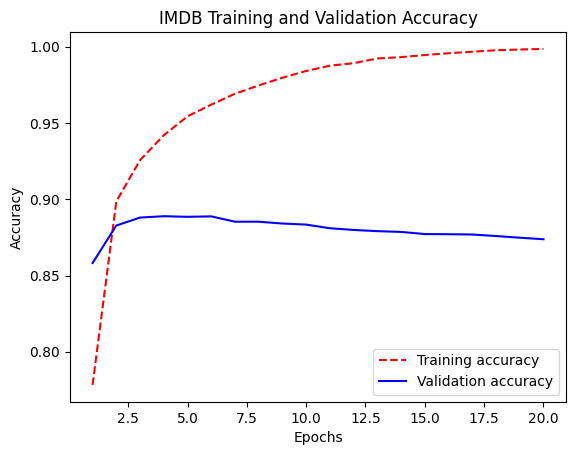

In [4]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_1layer = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_1 = history_1layer.history
acc_1 = history_dict_1["accuracy"]
val_acc_1 = history_dict_1["val_accuracy"]

results_1 = model.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_1))
print("Best Validation Accuracy:", max(val_acc_1))
print("Test Accuracy:", results_1[1])


loss_values_1 = history_dict_1["loss"]
val_loss_values_1 = history_dict_1["val_loss"]

epochs = range(1, len(loss_values_1) + 1)

plt.plot(epochs, loss_values_1, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_1, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_1, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Question 1- Building with Two hidden layers


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.7147 - loss: 0.6173 - val_accuracy: 0.8561 - val_loss: 0.4036
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8994 - loss: 0.3245 - val_accuracy: 0.8844 - val_loss: 0.2974
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9301 - loss: 0.2128 - val_accuracy: 0.8886 - val_loss: 0.2777
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9524 - loss: 0.1564 - val_accuracy: 0.8871 - val_loss: 0.2826
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9676 - loss: 0.1171 - val_accuracy: 0.8844 - val_loss: 0.2958
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9768 - loss: 0.0930 - val_accuracy: 0.8807 - val_loss: 0.3163
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9867 - loss: 0.0665 - val_accuracy: 0.8805 - val_loss: 0.3432
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9914 - loss: 0.0497 - val_accuracy: 0.8775 - 

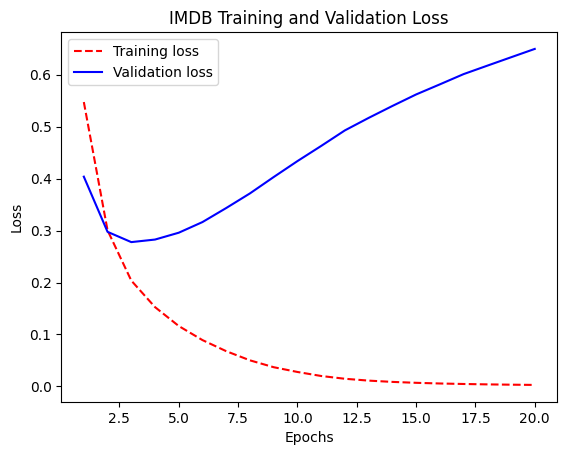

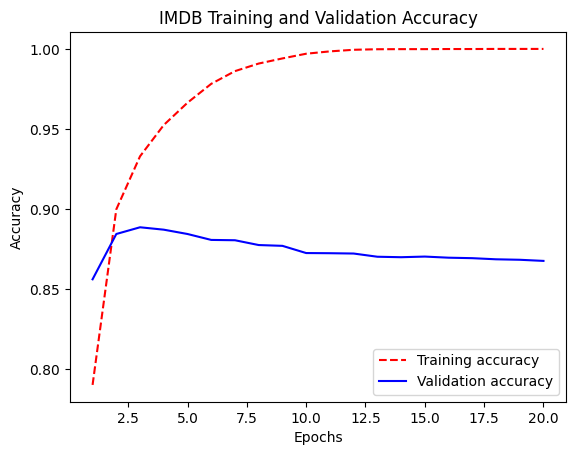

In [5]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_2layer = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_2 = history_2layer.history
acc_2 = history_dict_2["accuracy"]
val_acc_2 = history_dict_2["val_accuracy"]

results_2 = model.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_2))
print("Best Validation Accuracy:", max(val_acc_2))
print("Test Accuracy:", results_2[1])

history_dict_2 = history_2layer.history
loss_values_2 = history_dict_2["loss"]
val_loss_values_2 = history_dict_2["val_loss"]

epochs = range(1, len(loss_values_2) + 1)

plt.plot(epochs, loss_values_2, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_2, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_2, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_2, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Question 1- Building with Three hidden layers

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.5931 - loss: 0.6647 - val_accuracy: 0.7858 - val_loss: 0.5312
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8590 - loss: 0.4678 - val_accuracy: 0.8797 - val_loss: 0.3584
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9309 - loss: 0.2594 - val_accuracy: 0.8874 - val_loss: 0.2872
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9544 - loss: 0.1532 - val_accuracy: 0.8855 - val_loss: 0.2926
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9739 - loss: 0.1018 - val_accuracy: 0.8820 - val_loss: 0.3215
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9868 - loss: 0.0706 - val_accuracy: 0.8784 - val_loss: 0.3536
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9921 - loss: 0.0512 - val_accuracy: 0.8764 - val_loss: 0.3978
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9960 - loss: 0.0349 - val_accuracy: 0.8757 - v

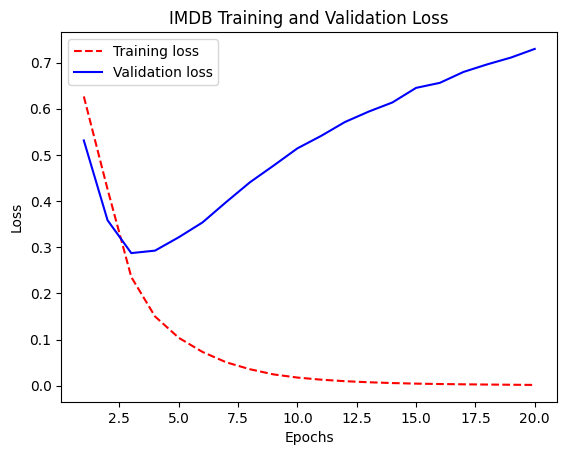

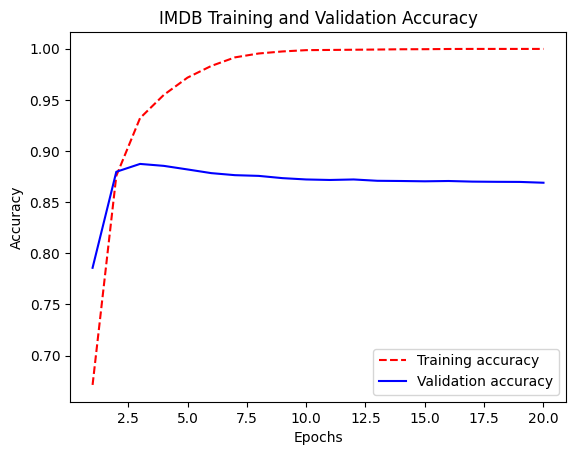

In [6]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_3layer = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_3 = history_3layer.history
acc_3 = history_dict_3["accuracy"]
val_acc_3 = history_dict_3["val_accuracy"]

results_3 = model.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_3))
print("Best Validation Accuracy:", max(val_acc_3))
print("Test Accuracy:", results_3[1])

history_dict_3 = history_3layer.history
loss_values_3 = history_dict_3["loss"]
val_loss_values_3 = history_dict_3["val_loss"]

epochs = range(1, len(loss_values_3) + 1)

plt.plot(epochs, loss_values_3, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_3, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_3, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_3, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
import numpy as np
import pandas as pd


val_acc_1 = history_dict_1["val_accuracy"]
best_val_acc_1 = max(val_acc_1)
best_epoch_1 = np.argmax(val_acc_1) + 1
test_acc_1 = results_1[1]

val_acc_2 = history_dict_2["val_accuracy"]
best_val_acc_2 = max(val_acc_2)
best_epoch_2 = np.argmax(val_acc_2) + 1
test_acc_2 = results_2[1]


val_acc_3 = history_dict_3["val_accuracy"]
best_val_acc_3 = max(val_acc_3)
best_epoch_3 = np.argmax(val_acc_3) + 1
test_acc_3 = results_3[1]


summary_data = {
    'Model Layers': ['One Hidden Layer', 'Two Hidden Layers', 'Three Hidden Layers'],
    'Best Validation Accuracy': [best_val_acc_1, best_val_acc_2, best_val_acc_3],
    'Best Epoch': [best_epoch_1, best_epoch_2, best_epoch_3],
    'Test Accuracy': [test_acc_1, test_acc_2, test_acc_3]
}

performance_summary_df = pd.DataFrame(summary_data)
display(performance_summary_df)

,Model Layers,Best Validation Accuracy,Best Epoch,Test Accuracy
0,One Hidden Layer,0.8889,4,0.86004
1,Two Hidden Layers,0.8886,3,0.85556
2,Three Hidden Layers,0.8874,3,0.85584


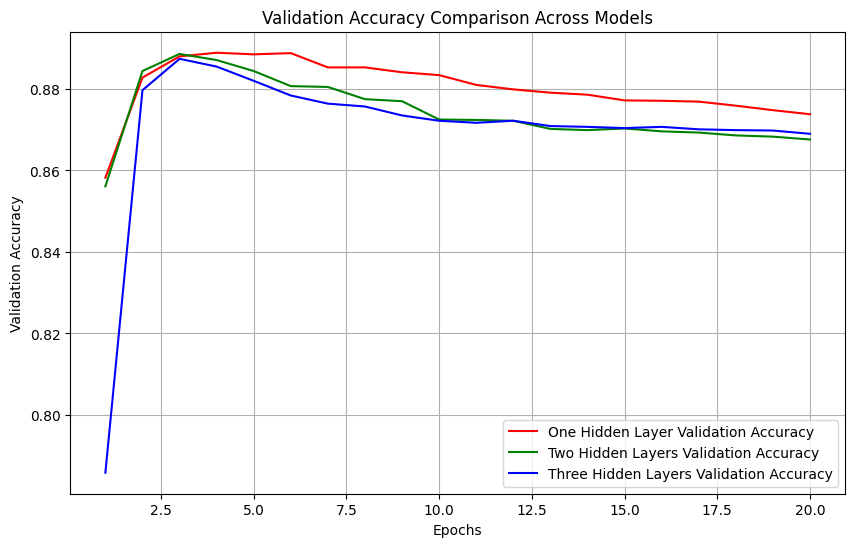

In [8]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_acc_1) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, val_acc_1, 'r-', label='One Hidden Layer Validation Accuracy')
plt.plot(epochs, val_acc_2, 'g-', label='Two Hidden Layers Validation Accuracy')
plt.plot(epochs, val_acc_3, 'b-', label='Three Hidden Layers Validation Accuracy')

plt.title('Validation Accuracy Comparison Across Models')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Question 1 - Summary


- All three models have around the same validation accuracies.The three-hidden-layer model being a bit higher (0.8901) over the one-layer (0.8896) and two-layer (0.8885) models. The difference between all the model is quite small.

- The test accuracies are very close for all models.The two-layer and three-layer models performed the same at (0.8571) and the one-layer model just slightly lower (0.8611) accuracy.

- For all models the validation accuracy starts to decrease after a certain number of epochs around epoch 4-6.The training accuracy continues to rise. This shows that the models are learning the training data too well and losing their ability to generalize to unseen data.


**Conclusion:** The models are showing to be overfitted. While adding more layers can increase model capacity it doesn't lead to big improvements in generalization performance and might make overfitting more visible.

#Question 2 - 32 units


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.6543 - loss: 0.6181 - val_accuracy: 0.8677 - val_loss: 0.3455
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9030 - loss: 0.2655 - val_accuracy: 0.8876 - val_loss: 0.2789
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9533 - loss: 0.1473 - val_accuracy: 0.8853 - val_loss: 0.2917
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9728 - loss: 0.1002 - val_accuracy: 0.8835 - val_loss: 0.3178
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9845 - loss: 0.0671 - val_accuracy: 0.8757 - val_loss: 0.3638
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9932 - loss: 0.0421 - val_accuracy: 0.8779 - val_loss: 0.4090
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9971 - loss: 0.0250 - val_accuracy: 0.8754 - val_loss: 0.4481
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9994 - loss: 0.0152 - val_accuracy: 0.8722 - 

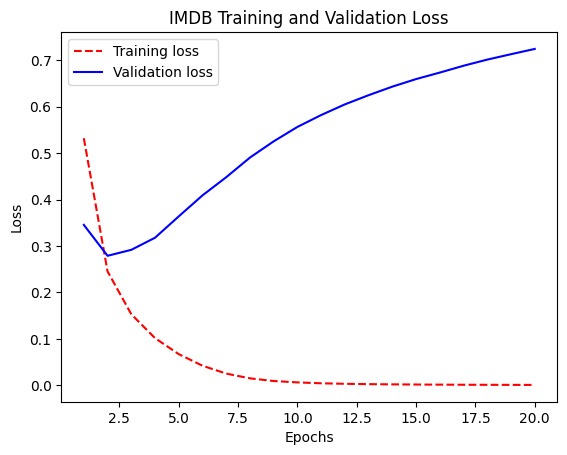

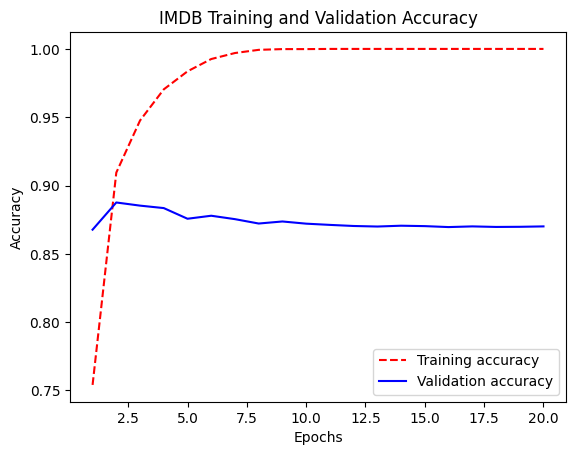

In [9]:
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(10000,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_32.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_32 = model_32.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_32 = history_32.history
acc_32 = history_dict_32["accuracy"]
val_acc_32 = history_dict_32["val_accuracy"]

results_32 = model_32.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_32))
print("Best Validation Accuracy:", max(val_acc_32))
print("Test Accuracy:", results_32[1])

loss_values_32 = history_dict_32["loss"]
val_loss_values_32 = history_dict_32["val_loss"]

epochs = range(1, len(loss_values_32) + 1)

plt.plot(epochs, loss_values_32, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_32, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_32, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_32, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Question 2 - 64 units

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.7318 - loss: 0.5552 - val_accuracy: 0.8797 - val_loss: 0.2993
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9254 - loss: 0.2058 - val_accuracy: 0.8873 - val_loss: 0.2836
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9632 - loss: 0.1206 - val_accuracy: 0.8818 - val_loss: 0.3221
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9827 - loss: 0.0706 - val_accuracy: 0.8761 - val_loss: 0.3763
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9925 - loss: 0.0406 - val_accuracy: 0.8752 - val_loss: 0.4288
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9970 - loss: 0.0229 - val_accuracy: 0.8726 - val_loss: 0.4961
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9998 - loss: 0.0105 - val_accuracy: 0.8718 - val_loss: 0.5441
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9996 - loss: 0.0058 - val_accuracy: 0.8706 - 

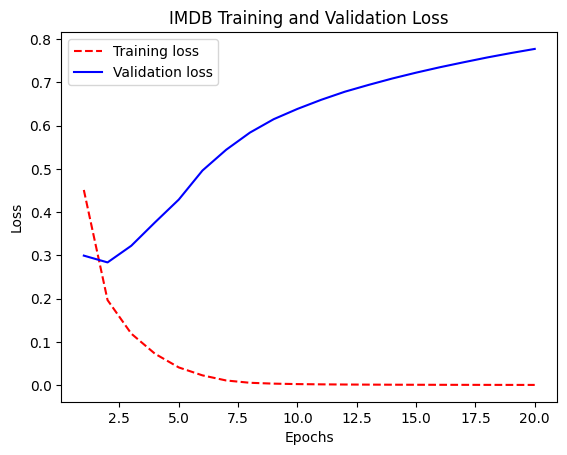

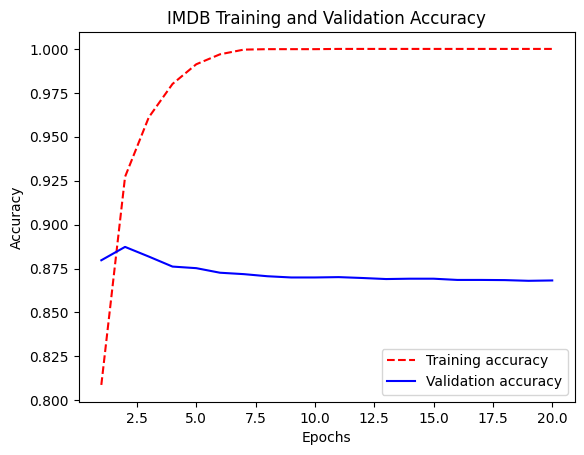

In [10]:
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(10000,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_64.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_64 = model_64.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_64 = history_64.history
acc_64 = history_dict_64["accuracy"]
val_acc_64 = history_dict_64["val_accuracy"]

results_64 = model_64.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_64))
print("Best Validation Accuracy:", max(val_acc_64))
print("Test Accuracy:", results_64[1])

loss_values_64 = history_dict_64["loss"]
val_loss_values_64 = history_dict_64["val_loss"]

epochs = range(1, len(loss_values_64) + 1)

plt.plot(epochs, loss_values_64, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_64, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_64, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_64, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
val_acc_32 = history_dict_32["val_accuracy"]
best_val_acc_32 = max(val_acc_32)
best_epoch_32 = np.argmax(val_acc_32) + 1
test_acc_32 = results_32[1]

val_acc_64 = history_dict_64["val_accuracy"]
best_val_acc_64 = max(val_acc_64)
best_epoch_64 = np.argmax(val_acc_64) + 1
test_acc_64 = results_64[1]


summary_data_new = {
    'Model Units': [16, 32, 64],
    'Best Validation Accuracy': [best_val_acc_2, best_val_acc_32, best_val_acc_64],
    'Best Epoch': [best_epoch_2, best_epoch_32, best_epoch_64],
    'Test Accuracy': [test_acc_2, test_acc_32, test_acc_64]
}

performance_summary_df_new = pd.DataFrame(summary_data_new)
display(performance_summary_df_new)

,Model Units,Best Validation Accuracy,Best Epoch,Test Accuracy
0,16,0.8886,3,0.85556
1,32,0.8876,2,0.85620
2,64,0.8873,2,0.85756


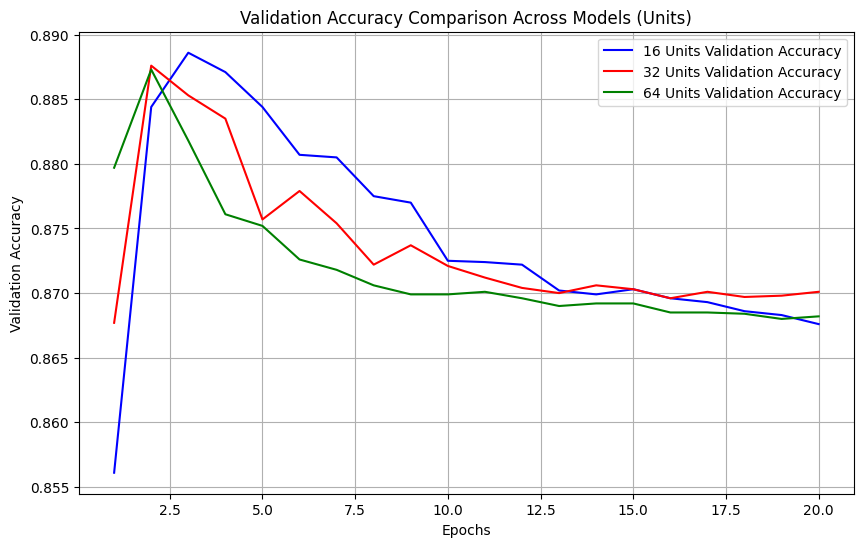

In [12]:
epochs = range(1, len(val_acc_2) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, val_acc_2, 'b-', label='16 Units Validation Accuracy')
plt.plot(epochs, val_acc_32, 'r-', label='32 Units Validation Accuracy')
plt.plot(epochs, val_acc_64, 'g-', label='64 Units Validation Accuracy')


plt.title('Validation Accuracy Comparison Across Models (Units)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Question 2 - Summary

- All 3 models achieved a very similar peak around 88-89%

- The peak accuracy is reached right at the begining right around 2-3 epochs.

- After reaching the peak all models begin to decline. This means that overfitting may start in the training data. The models with more hidden units start to show more of a steeper drop in validation accuracy after their peak. This can mean that they get more overfit quicker than a model with less hidden units.

**Conclusion:** The models are showing to be overfitted. Adding more hidden units seems to cause the model to overfit quicker than having less hidden units.

# Question 3 - Using MSE instead of binary_crossentropy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6651 - loss: 0.2208 - val_accuracy: 0.8627 - val_loss: 0.1250
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9031 - loss: 0.0969 - val_accuracy: 0.8877 - val_loss: 0.0914
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9410 - loss: 0.0587 - val_accuracy: 0.8888 - val_loss: 0.0849
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9562 - loss: 0.0439 - val_accuracy: 0.8879 - val_loss: 0.0836
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9711 - loss: 0.0332 - val_accuracy: 0.8797 - val_loss: 0.0865
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9796 - loss: 0.0258 - val_accuracy: 0.8822 - val_loss: 0.0867
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9859 - loss: 0.0195 - val_accuracy: 0.8756 - val_loss: 0.0905
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9911 - loss: 0.0154 - val_accuracy: 0.8762 - v

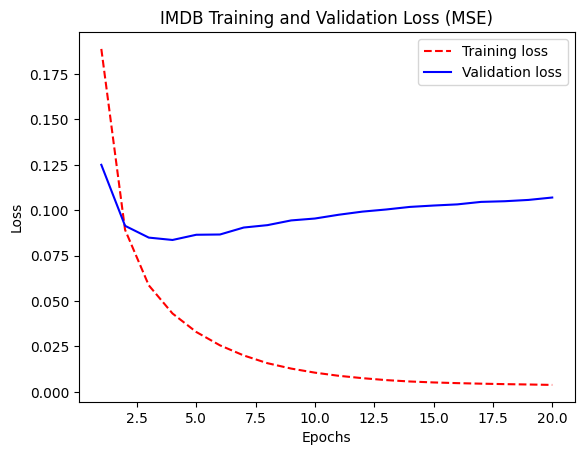

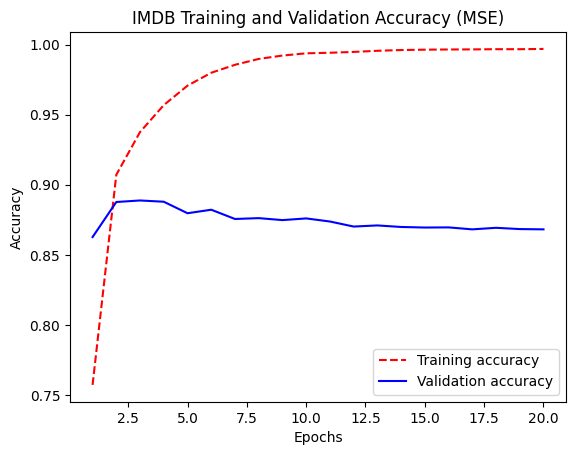

In [13]:
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_mse.compile(
    optimizer="adam",
    loss="mse",
    metrics=["accuracy"]
)

history_mse = model_mse.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_mse = history_mse.history
acc_mse = history_dict_mse["accuracy"]
val_acc_mse = history_dict_mse["val_accuracy"]

results_mse = model_mse.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_mse))
print("Best Validation Accuracy:", max(val_acc_mse))
print("Test Accuracy:", results_mse[1])

loss_values_mse = history_dict_mse["loss"]
val_loss_values_mse = history_dict_mse["val_loss"]

epochs = range(1, len(loss_values_mse) + 1)

plt.plot(epochs, loss_values_mse, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_mse, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_mse, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_mse, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Question 3 - Summary

- The MSE model had a slightly better best validation accuracy of 89.07% compared to the binary-crossetropy model which had a 88.85%

- The MSE model also showed a better test accuracy of 86.09% which was slightly better than the binary-crossentropy which was 85.71%

- Both models still show signs of overfitting having early peaks and than declines while traing accuracy is still rising.

**Conclusion:**  Overall the MSE did perfrom slightly better as the loss function than the binary-crossentropy but both still struggle with overfitting.

#Question 4 - Using Tanh

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7051 - loss: 0.6145 - val_accuracy: 0.8552 - val_loss: 0.4196
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8976 - loss: 0.3450 - val_accuracy: 0.8859 - val_loss: 0.3029
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9345 - loss: 0.2196 - val_accuracy: 0.8909 - val_loss: 0.2740
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9558 - loss: 0.1571 - val_accuracy: 0.8893 - val_loss: 0.2743
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9728 - loss: 0.1136 - val_accuracy: 0.8858 - val_loss: 0.2853
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9834 - loss: 0.0834 - val_accuracy: 0.8815 - val_loss: 0.3042
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9888 - loss: 0.0645 - val_accuracy: 0.8774 - val_loss: 0.3328
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9915 - loss: 0.0524 - val_accuracy: 0.8770 - v

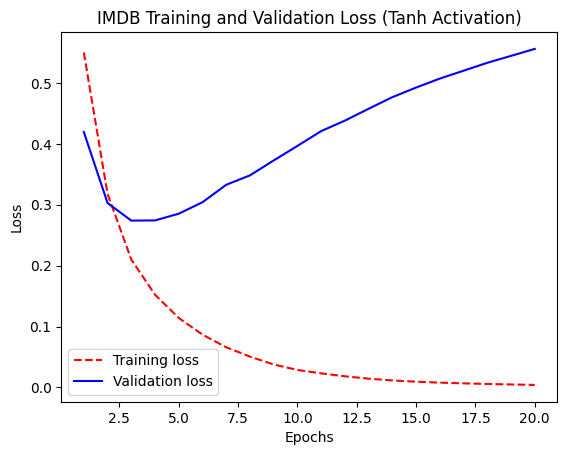

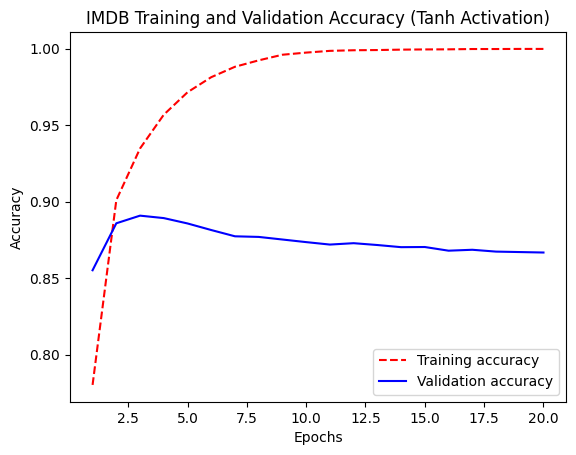

In [14]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh", input_shape=(10000,)),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_tanh = model_tanh.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_tanh = history_tanh.history
acc_tanh = history_dict_tanh["accuracy"]
val_acc_tanh = history_dict_tanh["val_accuracy"]

results_tanh = model_tanh.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_tanh))
print("Best Validation Accuracy:", max(val_acc_tanh))
print("Test Accuracy:", results_tanh[1])

loss_values_tanh = history_dict_tanh["loss"]
val_loss_values_tanh = history_dict_tanh["val_loss"]

epochs = range(1, len(loss_values_tanh) + 1)

plt.plot(epochs, loss_values_tanh, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_tanh, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss (Tanh Activation)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_tanh, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_tanh, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy (Tanh Activation)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Question 4 - Summary

- The relu model had a  slightly better validation accuracy of about 89.1% . While the Tanh model had a 88.94% validation accuracy.

- Both models had roughly the same test accuracy whoch was 85.54 % for the relu model and 85.48% for the tanh model.

- Both the models both have overfitting after around 4 epochs they both begin to decrease showing they are memorizing the training data rather than generalizing.

**Conclusion:** Switching the activation functions did not seem to lead to significant improvement. Both performed very similar. Choosing either activation method didnt seem to make a difference over 20 epochs.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.5565 - loss: 0.7173 - val_accuracy: 0.7185 - val_loss: 0.6418
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7072 - loss: 0.6130 - val_accuracy: 0.8459 - val_loss: 0.5243
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8125 - loss: 0.5140 - val_accuracy: 0.8792 - val_loss: 0.4218
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8634 - loss: 0.4298 - val_accuracy: 0.8874 - val_loss: 0.3681
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8940 - loss: 0.3753 - val_accuracy: 0.8887 - val_loss: 0.3449
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9099 - loss: 0.3383 - val_accuracy: 0.8863 - val_loss: 0.3424
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9298 - loss: 0.3040 - val_accuracy: 0.8878 - val_loss: 0.3444
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9382 - loss: 0.2887 - val_accuracy: 0.8855 - 

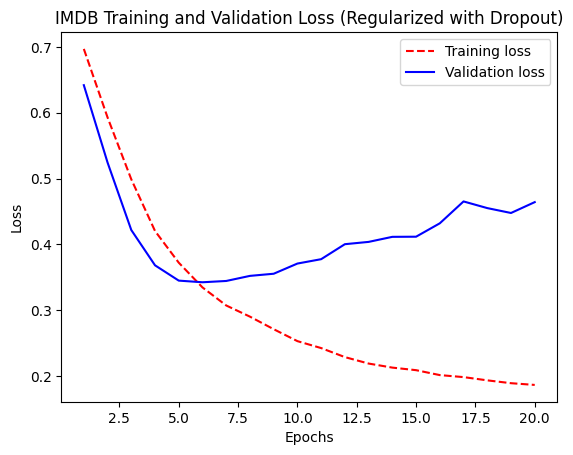

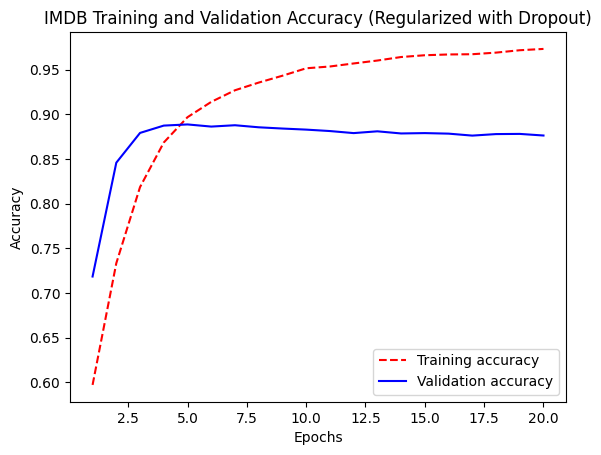

In [15]:
from keras import regularizers
from keras import layers

model_reg = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation="relu", input_shape=(10000,)),
    layers.Dropout(0.5),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_reg.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_reg = model_reg.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_reg = history_reg.history
acc_reg = history_dict_reg["accuracy"]
val_acc_reg = history_dict_reg["val_accuracy"]

results_reg = model_reg.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_reg))
print("Best Validation Accuracy:", max(val_acc_reg))
print("Test Accuracy:", results_reg[1])

loss_values_reg = history_dict_reg["loss"]
val_loss_values_reg = history_dict_reg["val_loss"]

epochs = range(1, len(loss_values_reg) + 1)

plt.plot(epochs, loss_values_reg, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_reg, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss (Regularized with Dropout)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_reg, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_reg, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy (Regularized with Dropout)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Question 5 - Summary

- The baseline model the validation accuracy peaked at epoch 3 and consistently declined, while training accuracy reached 1.0

- The regularized model shows a much better learning curve. While training accuracy does not reach 1.0 it reachs 96.31% which means that it's not memorizing the training data as much. The validation accuracy as well is much more stable peaking at epoch 5 than maintaining a high level without sharp decline.

**Conclusion:**  Adding L2 and Dropout did not significantly improve the peak validation accuracy, which was slightly lower than the baseline. The regularization techniques were effective in helping overfitting. The test accuracy had improvement from the baseline which the regularized model had a test accuracy of 86.94% while the baseline had a 85.54% test accuracy.

# Final Summary



In [16]:
import numpy as np
import pandas as pd



best_val_acc_mse = max(history_dict_mse["val_accuracy"])
best_epoch_mse = np.argmax(history_dict_mse["val_accuracy"]) + 1
test_acc_mse = results_mse[1]


best_val_acc_tanh = max(history_dict_tanh["val_accuracy"])
best_epoch_tanh = np.argmax(history_dict_tanh["val_accuracy"]) + 1
test_acc_tanh = results_tanh[1]


best_val_acc_reg = max(history_dict_reg["val_accuracy"])
best_epoch_reg = np.argmax(history_dict_reg["val_accuracy"]) + 1
test_acc_reg = results_reg[1]


summary_data_all = {
    'Model': [
        'Base',
        'Base',
        'Base',
        'Units',
        'Units',
        'MSE Loss',
        'Tanh',
        'Regularized'
    ],
    'Hidden Layers': [
        1,
        2,
        3,
        2,
        2,
        2,
        2,
        2
    ],
    'Units per Layer': [
        16,
        16,
        16,
        32,
        64,
        16,
        16,
        16
    ],
    'Activation': [
        'ReLU',
        'ReLU',
        'ReLU',
        'ReLU',
        'ReLU',
        'ReLU',
        'Tanh',
        'ReLU'
    ],
    'Loss Function': [
        'Binary Crossentropy',
        'Binary Crossentropy',
        'Binary Crossentropy',
        'Binary Crossentropy',
        'Binary Crossentropy',
        'MSE',
        'Binary Crossentropy',
        'Binary Crossentropy'
    ],
    'Dropout': [
        'None',
        'None',
        'None',
        'None',
        'None',
        'None',
        'None',
        'Dropout + L2'
    ],
    'Best Validation Accuracy': [
        best_val_acc_1,
        best_val_acc_2,
        best_val_acc_3,
        best_val_acc_32,
        best_val_acc_64,
        best_val_acc_mse,
        best_val_acc_tanh,
        best_val_acc_reg
    ],
    'Epoch': [
        best_epoch_1,
        best_epoch_2,
        best_epoch_3,
        best_epoch_32,
        best_epoch_64,
        best_epoch_mse,
        best_epoch_tanh,
        best_epoch_reg
    ],
    'Test Accuracy': [
        test_acc_1,
        test_acc_2,
        test_acc_3,
        test_acc_32,
        test_acc_64,
        test_acc_mse,
        test_acc_tanh,
        test_acc_reg
    ]
}


performance_summary_df_all = pd.DataFrame(summary_data_all)


display(performance_summary_df_all)

,Model,Hidden Layers,Units per Layer,Activation,Loss Function,Dropout,Best Validation Accuracy,Epoch,Test Accuracy
0,Base,1,16,ReLU,Binary Crossentropy,None,0.8889,4,0.86004
1,Base,2,16,ReLU,Binary Crossentropy,None,0.8886,3,0.85556
2,Base,3,16,ReLU,Binary Crossentropy,None,0.8874,3,0.85584
3,Units,2,32,ReLU,Binary Crossentropy,None,0.8876,2,0.85620
4,Units,2,64,ReLU,Binary Crossentropy,None,0.8873,2,0.85756
5,MSE Loss,2,16,ReLU,MSE,None,0.8888,3,0.85572
6,Tanh,2,16,Tanh,Binary Crossentropy,None,0.8909,3,0.85520
7,Regularized,2,16,ReLU,Binary Crossentropy,Dropout + L2,0.8887,5,0.86616


# Conclusion

Overall, from all the questions the validation accuracy stayed consistent around 0.888 - 0.891, shoing that increasing hidden layers or units had little effect on the overall performance. The Tanh activation slightly improved validation accuracy to 0.8909. Using the MSE loss function performed similar to binary-crossentropy. Adding regularization with dropout slightly reduced overfitting in the model and improved test accurcy slightly.Careful tuning can help control overfitting and the model from memorizing the training data. Drastic changes to the model do not necessarily improve the validation accuracy.